# Figure A3: Canal closure and rebellions: flexible treatment intensity

In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"


In [4]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"
graph set window fontface "Cambria"
set scheme s2color





not available in non-GUI version



In [5]:
**************************************************************************
*** FigureA3. Canal closure and rebellions: flexible treatment intensity
**************************************************************************
gen canaltown=(town1820_r10canal*alongcanal)/town1820

preserve
egen intensity=cut(canal_den),at(0,0.001,2,4,6,15)
replace intensity=-1 if alongcanal==0
tab intensity, gen(inten)
reghdfe $Y c.reform#(c.inten2-inten6), absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year) cluster(OBJECTID)
matrix coef = e(b) 
matrix cov = e(V) 
gen coef = .
gen se = .
forvalues i = 1(1)5 {
 replace coef = coef[1,`i'] if _n==`i'
 replace se = sqrt(cov[`i',`i']) if _n==`i'
}
gen lb=coef-invttail(e(df_r),0.025)*se 
gen ub=coef+invttail(e(df_r),0.025)*se 
keep coef se lb ub
drop if coef == .
gen ph_intensity=_n
#d ;
twoway 
(line lb ph_intensity, lpattern(dash) lcolor("0 0 0"))
(line ub ph_intensity, lpattern(dash) lcolor("0 0 0"))
(scatter coef ph_intensity, color(gs0) msize(*0.75))
(line coef ph_intensity, lpattern(solid) lcolor("4 4 4"))
,
ytitle("Coefficients", size(*0.9)) 
xtitle("Canal length per 100 square km", size(*0.9) margin(medsmall))
yline(-0.05(0.025)0.10, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(1(0.5)5, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
yline(0, lpattern(dash) lcolor("128 0 0"))
ylabel(-0.05(0.05)0.10, angle(0) format(%5.2f) labsize(*0.85))
xlabel(1 "0" 2 "2" 3 "4" 4 "6" 5 "6+", labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(off)
;
#d cr
graph export "Results/Figures/figureA3a.pdf", replace
restore




(12,052 missing values generated)



(131,524 real changes made)


  intensity |      Freq.     Percent        Cum.
------------+-----------------------------------
         -1 |    131,524       87.30       87.30
          0 |      2,358        1.57       88.87
       .001 |      3,930        2.61       91.48
          2 |      7,598        5.04       96.52
          4 |      2,882        1.91       98.43
          6 |      2,358        1.57      100.00
------------+-----------------------------------
      Total |    150,650      100.00

(MWFE estimator converged in 3 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 4 HDFE groups                           F(   5,    535) =       1.68
Statistics robust to heteroskedasticity           Prob > F        =     0.1382
                                                  R-squared       =     0.0632
                                                  Adj R-squared   =     0.0471
              

In [6]:
preserve
egen intensity=cut(canaltown), at(0,.2,.4,.6,.8,1.1)
replace intensity=-1 if alongcanal==0
tab intensity, gen(inten)
reghdfe $Y c.reform#(c.inten2-inten6), absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year) cluster(OBJECTID)
matrix coef = e(b) 
matrix cov = e(V) 
gen coef = .
gen se = .
forvalues i = 1(1)5 {
 replace coef = coef[1,`i'] if _n==`i'
 replace se = sqrt(cov[`i',`i']) if _n==`i'
}
gen lb=coef-invttail(e(df_r),0.025)*se 
gen ub=coef+invttail(e(df_r),0.025)*se 
keep coef se lb ub
drop if coef == .
gen ph_intensity=_n
#d ;
twoway 
(line lb ph_intensity, lpattern(dash) lcolor("0 0 0"))
(line ub ph_intensity, lpattern(dash) lcolor("0 0 0"))
(scatter coef ph_intensity, color(gs0) msize(*0.75))
(line coef ph_intensity, lpattern(solid) lcolor("4 4 4"))
,
ytitle("Coefficients", size(*0.9)) 
xtitle("Share of towns within 10km to the canal", size(*0.9) margin(medsmall))
yline(-0.05(0.025)0.15, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(1(0.5)5, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
yline(0, lpattern(dash) lcolor("128 0 0"))
ylabel(-0.05(0.05)0.15, angle(0) format(%5.2f) labsize(*0.85))
xlabel(1 "0.2" 2 "0.4" 3 "0.6" 4 "0.8" 5 "1.0", labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(off)
;
#d cr
graph export "Results/Figures/figureA3b.pdf", replace
restore




(12,052 missing values generated)

(131,524 real changes made)


  intensity |      Freq.     Percent        Cum.
------------+-----------------------------------
         -1 |    131,524       87.30       87.30
          0 |      3,930        2.61       89.91
         .2 |      3,144        2.09       92.00
         .4 |      3,144        2.09       94.09
         .6 |      5,240        3.48       97.57
         .8 |      3,668        2.43      100.00
------------+-----------------------------------
      Total |    150,650      100.00

(MWFE estimator converged in 3 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 4 HDFE groups                           F(   5,    535) =       2.19
Statistics robust to heteroskedasticity           Prob > F        =     0.0540
                                                  R-squared       =     0.0634
                                                  Adj R-squared   =     0.0473
               

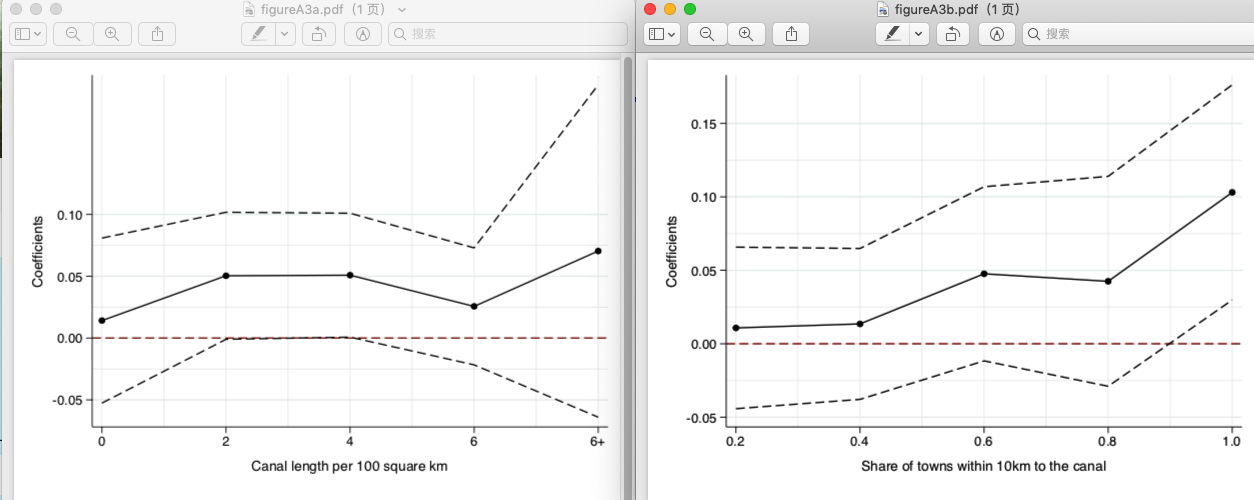

Note. The figure depicts the changes in rebellions before and after the 1826 reform by the canal’s geographic and economic impact on the county. The solid lines represent the point estimates, whereas the dashed lines represent the 95% confidence intervals based on standard errors clustered at the county level. The dependent variable is the inverse hyperbolic sine of the number of rebellions normalized by 1600 population. The independent variables for panel A are the length of canal per 100 square kilometers. The independent variables for panel B are the share of 1820 towns within 10 kilometers from the canal. The regression considers county fixed effects, year fixed effects, pre-treatment rebelliousness × year fixed effects, and province × year fixed effects .

In [7]:
**************************************************************************
*** Write to Latex
**************************************************************************
file open f using "Results/Figures/figureA3.tex", write replace
file write f "\begin{figure}[p]\captionsetup{justification=centering,singlelinecheck=false,width=0.8\textwidth}" _n
file write f "\begin{center}" _n
file write f "\caption{Canal closure and rebellions: flexible treatment intensity} " _n
file write f "\subfloat[Geographic intensity: length of canal]{" _n
file write f "\includegraphics[width=.7\textwidth]{Figures/figureA3a.pdf}}\\ " _n
file write f "\subfloat[Economic intensity: dependence on canal]{ " _n
file write f "\includegraphics[width=.7\textwidth]{Figures/figureA3b.pdf}}\\ " _n
file write f "\end{center}" _n
file write f "\footnotesize{\textit{Note.} The figure depicts the changes in rebellions before and after the 1826 reform by the canal's geographic and economic impact on the county. "
file write f "The solid lines represent the point estimates, whereas the dashed lines represent the 95\% confidence intervals based on standard errors clustered at the county level. "
file write f "The dependent variable is the inverse hyperbolic sine of the number of rebellions normalized by 1600 population. "
file write f "The independent variables for panel A are the length of canal per 100 square kilometers. The independent variables for panel B are the share of 1820 towns within 10 kilometers from the canal. "
file write f "The regression considers county fixed effects, year fixed effects, pre-treatment rebelliousness $ \times $ year fixed effects, and province $ \times $ year fixed effects . }"
file write f "\end{figure}" _n
file close f


(file Results/Figures/figureA3.tex not found)















